# Further Data Anaylsis and Preliminary Modeling 

## The goals of this notebook are the following:
- conduct a statistical test to gain more insight into data, possibly will feature engineer based on result.
- solve class imbalance issue with target variable.
- begin creating simple models to test baseline performance and find additional insights.
- Use GridSearch to optimize hyperparamaeters.
- Compare models based on metrics such as F1 score and Recall score to select a final model

In [1]:
import seaborn as sns 
import scipy.stats as scs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

In [2]:
df=pd.read_csv('Cleaned_Loan_Dataset.csv',index_col=0)

In [3]:
df.corr() #checking for multicolinearity

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,Age_at_disbursal,Salaried_High_CNS,High_risk_High_loan,Total_Accounts,Too_many_accounts,ltv_risk,Total_Overdue_Accts,Voter_ID_Overdue_accts,Age_Deliquent,High_Overdue_Inquires
UniqueID,1.000000,0.146522,0.147428,-0.032781,-0.002939,0.024429,-0.021426,0.030587,-0.029204,-0.056656,...,0.021351,-0.010486,0.025461,-0.016450,-0.008645,-0.028696,-0.011895,-0.002875,-0.007150,0.007722
disbursed_amount,0.146522,1.000000,0.748162,0.379001,0.016800,0.079607,0.100622,0.069067,0.017901,-0.024509,...,-0.055719,0.012563,0.142484,0.033880,0.028339,0.202989,0.018813,0.004072,0.018549,0.017189
asset_cost,0.147428,0.748162,1.000000,-0.305327,0.018184,0.153044,-0.000393,0.280159,-0.066654,-0.025451,...,-0.116350,-0.037214,0.112079,-0.029004,-0.029700,-0.227683,-0.012960,0.011382,-0.009384,-0.006841
ltv,-0.032781,0.379001,-0.305327,1.000000,0.004870,-0.105760,0.120559,-0.301935,0.115946,0.003909,...,0.081687,0.068754,0.039703,0.088414,0.083037,0.666992,0.047955,-0.007408,0.041183,0.036727
branch_id,-0.002939,0.016800,0.018184,0.004870,1.000000,0.231202,-0.050231,0.052089,0.018231,0.192658,...,-0.003525,-0.007137,0.001749,-0.010600,-0.011384,-0.006508,-0.007325,-0.010579,-0.000099,-0.005359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ltv_risk,-0.028696,0.202989,-0.227683,0.666992,-0.006508,-0.113443,0.127632,-0.248325,0.094904,-0.009319,...,0.100154,0.048888,0.052619,0.108700,0.079678,1.000000,0.154105,0.040246,0.068660,0.055052
Total_Overdue_Accts,-0.011895,0.018813,-0.012960,0.047955,-0.007325,-0.043098,0.026829,-0.067199,-0.024387,-0.010531,...,0.141639,-0.065638,0.281134,0.350441,0.166884,0.154105,1.000000,0.253805,0.488125,0.216444
Voter_ID_Overdue_accts,-0.002875,0.004072,0.011382,-0.007408,-0.010579,-0.003108,-0.001363,0.041332,-0.027427,0.032389,...,0.042835,-0.033676,0.094890,0.075251,0.031305,0.040246,0.253805,1.000000,0.122955,0.068204
Age_Deliquent,-0.007150,0.018549,-0.009384,0.041183,-0.000099,-0.023706,0.019290,-0.055396,-0.013984,-0.003099,...,0.123351,-0.000985,0.362347,0.324303,0.213918,0.068660,0.488125,0.122955,1.000000,0.134854


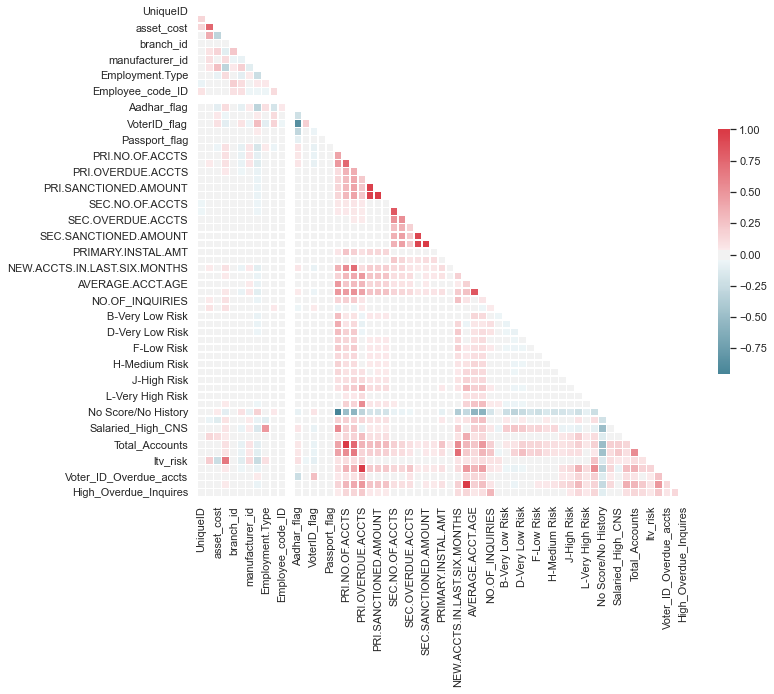

In [4]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

# Statistical Test 

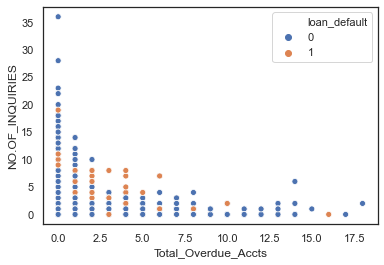

In [6]:
sns.scatterplot(x=df['Total_Overdue_Accts'],y=df['NO.OF_INQUIRIES'],hue=df.loan_default)

In [7]:
df['Total_Overdue_Accts'].describe()

count    202679.000000
mean          0.153903
std           0.535437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          18.000000
Name: Total_Overdue_Accts, dtype: float64

In [8]:
df['NO.OF_INQUIRIES'].describe()

count    202679.000000
mean          0.215355
std           0.723261
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: NO.OF_INQUIRIES, dtype: float64

In [9]:
df.loc[:,'loan_default'].mean()

0.21981063652376417

In [10]:
df.loc[(df['NO.OF_INQUIRIES']>=2) & (df['Total_Overdue_Accts']>=1),'loan_default'].mean()

0.32693461307738453

# 1 Sample Mean Test
## We will be testing whether there is a statistically siginifcant difference in loan default between the group of borrowers wit a high number of inquires and high number of overdue accounts compared to the general borrower population.
## Null and Alternative Hypotheseses 
## asuming alpha=.05

## Ho:μo=μ1
## Ha: μ0≠μ1

In [11]:
high_risk_mean=df.loc[(df['NO.OF_INQUIRIES']>=2) & (df['Total_Overdue_Accts']>=1),'loan_default'].mean()
high_risk_std=df.loc[(df['NO.OF_INQUIRIES']>=2) & (df['Total_Overdue_Accts']>=1),'loan_default'].std()
high_risk_len=len(df.loc[(df['NO.OF_INQUIRIES']>=2) & (df['Total_Overdue_Accts']>=1),'loan_default'])

In [12]:
gen_pop_mean=df.loc[:,'loan_default'].mean()
gen_pop_std=df.loc[:,'loan_default'].std()
gen_pop_len=len(df.loc[:,'loan_default'])

In [13]:
num=high_risk_mean-gen_pop_mean
denom=gen_pop_std/np.sqrt(gen_pop_len)
Test_stat=num/denom

In [14]:
Test_stat

116.45700751988142

In [15]:
P_value=(scs.norm.sf(Test_stat))/2 #divided by 2 since 2 tail test
P_value #smaller than  threshold in each tail=.05/2=.025

0.0

## Thus, we can reject the null hypothesis showing that there is a statistically siginificant differnce in default rates for this 'high-risk' group. We can see this through our very large test statistic which resulted in a p value of approximatly zero. (much smaller than .025)

## Feature Engineering

In [16]:
df['High_Overdue_Inquires']=np.where((df['NO.OF_INQUIRIES']>=2) & (df['Total_Overdue_Accts']>=1),1,0)

In [17]:
df['High_Overdue_Inquires'].value_counts()

0    201012
1      1667
Name: High_Overdue_Inquires, dtype: int64

In [18]:
corrs_dict={} #checking correlations of all features with target (car loan defaults)
for col in df.columns:
    try:
        corr=df['loan_default'].corr(df[col])
    except TypeError:
        pass
    finally:
        corrs_dict[corr]=col
sorted(corrs_dict.items(),reverse=True)

[(0.09865138442456285, 'ltv'),
 (nan, 'MobileNo_Avl_Flag'),
 (1.0, 'loan_default'),
 (0.07868482558182581, 'disbursed_amount'),
 (0.07800923886675715, 'ltv_risk'),
 (0.05166337891781657, 'State_ID'),
 (0.04529642461880197, 'VoterID_flag'),
 (0.04328621132149596, 'NO.OF_INQUIRIES'),
 (0.040154835787106345, 'M-Very High Risk'),
 (0.039927526668597856, 'PRI.OVERDUE.ACCTS'),
 (0.03872758757134032, 'Total_Overdue_Accts'),
 (0.034648380479632236, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'),
 (0.03378281467026905, 'UniqueID'),
 (0.03315508165348842, 'No Score/No History'),
 (0.03211410100190991, 'High_risk_High_loan'),
 (0.031931808062561726, 'Voter_ID_Overdue_accts'),
 (0.030509821948578413, 'Age_Deliquent'),
 (0.03036924810394667, 'branch_id'),
 (0.02859220470520207, 'Date.of.Birth'),
 (0.02749808985196973, 'K-High Risk'),
 (0.026514159590324732, 'supplier_id'),
 (0.02355695372511215, 'High_Overdue_Inquires'),
 (0.02167992082929982, 'Employee_code_ID'),
 (0.021673361853525686, 'I-Medium Risk'),


In [19]:
for col in df.columns:
    print(f'{col}:{df[col].dtype}') #checking if  final df is all numerical

UniqueID:int64
disbursed_amount:int64
asset_cost:int64
ltv:float64
branch_id:int64
supplier_id:int64
manufacturer_id:int64
Current_pincode_ID:int64
Date.of.Birth:object
Employment.Type:int64
DisbursalDate:object
State_ID:int64
Employee_code_ID:int64
MobileNo_Avl_Flag:int64
Aadhar_flag:int64
PAN_flag:int64
VoterID_flag:int64
Driving_flag:int64
Passport_flag:int64
PERFORM_CNS.SCORE:int64
PRI.NO.OF.ACCTS:int64
PRI.ACTIVE.ACCTS:int64
PRI.OVERDUE.ACCTS:int64
PRI.CURRENT.BALANCE:int64
PRI.SANCTIONED.AMOUNT:int64
PRI.DISBURSED.AMOUNT:int64
SEC.NO.OF.ACCTS:int64
SEC.ACTIVE.ACCTS:int64
SEC.OVERDUE.ACCTS:int64
SEC.CURRENT.BALANCE:int64
SEC.SANCTIONED.AMOUNT:int64
SEC.DISBURSED.AMOUNT:int64
PRIMARY.INSTAL.AMT:int64
SEC.INSTAL.AMT:int64
NEW.ACCTS.IN.LAST.SIX.MONTHS:int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS:int64
AVERAGE.ACCT.AGE:float64
CREDIT.HISTORY.LENGTH:float64
NO.OF_INQUIRIES:int64
loan_default:int64
B-Very Low Risk:int64
C-Very Low Risk:int64
D-Very Low Risk:int64
E-Low Risk:int64
F-Low Ris

In [20]:
df.isna().any().sum() #confirming no null or missing values

0

In [21]:
df.shape #confirming final shape of dataframe

(202679, 63)

In [22]:
df.to_csv('Cleaned_Loan_Dataset.csv') #saving final df for modeling

In [23]:
df=pd.read_csv('Cleaned_Loan_Dataset.csv',index_col=0)
df.shape #all good with reading in dataset

(202679, 63)

In [24]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,Age_at_disbursal,Salaried_High_CNS,High_risk_High_loan,Total_Accounts,Too_many_accounts,ltv_risk,Total_Overdue_Accts,Voter_ID_Overdue_accts,Age_Deliquent,High_Overdue_Inquires
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,1,...,34.205479,0,0,0,0,1,0,0,0.000000,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,0,...,33.178082,0,0,1,0,0,1,0,33.178082,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,0,...,32.397260,0,0,0,0,1,0,0,0.000000,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,0,...,24.838356,0,0,3,0,1,0,0,0.000000,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,0,...,41.065753,0,0,0,0,1,0,0,0.000000,0


# Downsampling Majority
## Since, we have a large class imbalance and a very large dataset, downsampling the majority is a viable option. It will also help speed up using gridsearch to optimize hyperparameters.

In [25]:
df.loan_default.value_counts(normalize=True) 
#target distribution,have to resolve class imbalance

0    0.780189
1    0.219811
Name: loan_default, dtype: float64

In [26]:
default=df[df['loan_default']==1] #minority
majority=df[df['loan_default']==0] #majoirty

In [27]:
majority_downsampled = resample(majority,
                                replace = False, # sample without replacement
                                n_samples = len(default), 
                                random_state = 1) 

In [28]:
downsampled = pd.concat([majority_downsampled, default]) 
#concatanating the majority and minority classes back together

In [29]:
downsampled.loan_default.value_counts() #confirming no class imbalance 

1    44551
0    44551
Name: loan_default, dtype: int64

In [30]:
downsampled.shape #shape of downsampled dataframe

(89102, 63)

In [31]:
X=downsampled.drop(axis=1,labels=['loan_default','Date.of.Birth','DisbursalDate'])
#dropping target variable and two object features from downsampled dataframe
Y=downsampled['loan_default'] #target 

In [32]:
print(X.shape) #shape of downsampled features dataframe
Y.shape #shape of target 

(89102, 60)


(89102,)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=1)

In [34]:
print(X_train.shape)
X_test.shape

(66826, 60)


(22276, 60)

## To get a baseline 'dummy' model, first I will build a simple logistic regression. 
# Logistic Regression Model

In [35]:
lr_test=LogisticRegression(random_state=1)

In [36]:
lr_params={'penalty':['l1','l2',None],'C':[.01,.1,.5,1],'solver':['liblinear','saga'],
       'max_iter':[100,250,500]}

In [37]:
lr_test_grid=GridSearchCV(lr_test,lr_params,scoring='f1',n_jobs=-1,cv=4,verbose=1)

In [38]:
lr_test_grid.fit(X_train,y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  9.0min finished
/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'max_iter': [100, 250, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [39]:
lr_test_grid.best_score_

0.6525328862753375

In [40]:
lr_test_grid.best_estimator_

LogisticRegression(C=0.01, penalty='l1', random_state=1, solver='saga')

In [41]:
y_preds=lr_test_grid.best_estimator_.predict(X_test)
test_f1=metrics.f1_score(y_test,y_preds)
test_f1

0.6541409792217112

In [42]:
y_train_preds=lr_test_grid.best_estimator_.predict(X_train)
print(f'Training Accuracy:{metrics.accuracy_score(y_train,y_train_preds)}')
print(f'Testing Accuracy:{metrics.accuracy_score(y_test,y_preds)}')

Training Accuracy:0.5228952802801304
Testing Accuracy:0.5240168791524511


## Our F1 score of 65.4% on the test set is encouraging, our testing accuracy of 52.4% isn't great however in this case what we really care about is identifying the borrowers who will default accurately. Thus, Recall is really what we care about. Thus, let's see this model's recall scores.

In [43]:
print(f'Training Recall Score:{metrics.recall_score(y_train,y_train_preds)}')
print(f'Testing Recall Score:{metrics.recall_score(y_test,y_preds)}')

Training Recall Score:0.8974711955708514
Testing Recall Score:0.9004130747126436


In [44]:
metrics.confusion_matrix(y_test,y_preds)

array([[ 1646,  9494],
       [ 1109, 10027]])

## Wow, this model performed very well (90% Test Recall Score). I will definitely look more into this model later and play around more with hyperparamters (max iterations didn't even converge) but for now let's see how a few other models compare. But this model certainly looks to be in contention.

# KNN Model

In [45]:
knn=KNeighborsClassifier()
knn_params_t={'n_neighbors':range(1,11)}

In [46]:
knn_grid=GridSearchCV(knn,knn_params_t,cv=4,verbose=1,n_jobs=-1,scoring='f1')

In [47]:
knn_grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 11)}, scoring='f1', verbose=1)

In [48]:
knn_grid.best_params_

{'n_neighbors': 9}

In [49]:
knn_grid.best_score_

0.5476586746350123

In [50]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [51]:
y_train_pred=knn_grid.best_estimator_.predict(X_train)
y_pred=knn_grid.best_estimator_.predict(X_test)

In [52]:
test_f1=metrics.f1_score(y_test,y_pred)
test_f1

0.552317880794702

In [53]:
print(f'Training Accuracy:{metrics.accuracy_score(y_train,y_train_pred)}')
print(f'Testing Accuracy:{metrics.accuracy_score(y_test,y_pred)}')

Training Accuracy:0.6584712537036482
Testing Accuracy:0.5448015801759741


In [54]:
print(f'Training Recall Score:{metrics.recall_score(y_train,y_train_pred)}')
print(f'Testing Recall Score:{metrics.recall_score(y_test,y_pred)}')

Training Recall Score:0.6702678437827323
Testing Recall Score:0.5616918103448276


## Interestingly, The model seems to be overfit based on the n neighbors parameter selected by grid search. Overall, this model performed ok but not nearly as well as the logistic regression. For now, I want to test out more models but at the very least, I want to test if this model could help improve performance in a ensemble model and maybe try more n neighbor options.

# Decision Tree Model

In [55]:
dt_clf=DecisionTreeClassifier(random_state=1)
params_dt={'criterion':['gini','entropy'],'max_depth':[2,3,5,6],
           'max_features':[2,4,5],'min_samples_leaf':[1,2,4,6]}

In [56]:
dt_grid=GridSearchCV(dt_clf,params_dt,cv=4,verbose=1,n_jobs=-1,scoring='f1')

In [57]:
dt_grid.fit(X_train,y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    5.3s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6], 'max_features': [2, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 6]},
             scoring='f1', verbose=1)

In [58]:
dt_grid.best_score_

0.6579980213160991

In [59]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=5, random_state=1)

In [60]:
y_train_preds=dt_grid.best_estimator_.predict(X_train)
y_preds=dt_grid.best_estimator_.predict(X_test)
dt_test_f1_score=metrics.f1_score(y_test,y_preds)

In [61]:
dt_test_f1_score

0.6588040290705087

In [62]:
print(f'Training Accuracy:{metrics.accuracy_score(y_train,y_train_preds)}')
print(f'Testing Accuracy:{metrics.accuracy_score(y_test,y_preds)}')

Training Accuracy:0.5192290425882141
Testing Accuracy:0.5194828514993716


In [63]:
print(f'Training Recall Score:{metrics.recall_score(y_train,y_train_preds)}')
print(f'Testing Recall Score:{metrics.recall_score(y_test,y_preds)}')

Training Recall Score:0.9273978752057459
Testing Recall Score:0.9279813218390804


## The Decision Tree Model performed very well. In terms of F1 score, the Decision Tree edged out the logisitic regression at 65.8% on the test set vs 65.4% respectively. However, The Decision Tree's performance was more notable in terms of Recall score which is ultimately the most important metric in my decision making. It achieved a Recall score of over 92.7% on both the test and training sets, both well above the logistic regression model's equivalents. It will be interesting to see how this model compares to other top perrfoming models like XGBoost and Random Forest. At the very least, this model should be in strong consideration due to it's scores and also it's high interpretability.


# Random Forest Model 

In [64]:
rf_clf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=7,
                              min_samples_leaf=7,
                              random_state=1)

In [65]:
params_rf={'max_leaf_nodes':[100,250,500]}

In [66]:
grid_forest=GridSearchCV(rf_clf,params_rf,scoring='f1',cv=4,verbose=1,n_jobs=-1)

In [67]:
grid_forest.fit(X_train,y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   13.8s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   13.8s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=7,
                                              min_samples_leaf=7,
                                              random_state=1),
             n_jobs=-1, param_grid={'max_leaf_nodes': [100, 250, 500]},
             scoring='f1', verbose=1)

In [68]:
grid_forest.best_params_

{'max_leaf_nodes': 250}

In [69]:
grid_forest.best_score_

0.6228437015818294

In [70]:
grid_forest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=250,
                       min_samples_leaf=7, random_state=1)

In [71]:
y_train_preds=grid_forest.best_estimator_.predict(X_train)
y_preds=grid_forest.best_estimator_.predict(X_test)

In [72]:
test_f1_dt=metrics.f1_score(y_test,y_preds)
test_f1

0.552317880794702

In [73]:
print(f'Training Accuracy:{metrics.accuracy_score(y_train,y_train_preds)}')
print(f'Testing Accuracy:{metrics.accuracy_score(y_test,y_preds)}')

Training Accuracy:0.6191452428695418
Testing Accuracy:0.6052702460046687


In [74]:
print(f'Training Recall Score:{metrics.recall_score(y_train,y_train_preds)}')
print(f'Testing Recall Score:{metrics.recall_score(y_test,y_preds)}')

Training Recall Score:0.6730510249887774
Testing Recall Score:0.658135775862069


## Surprisingly, even after optimizing hyperparameters through GridSearch, the Random Forest Model did not do as well as the Decision Tree Model.  In terms of F1 score it achieved a  .55 on the test set and a recall score of .65 on the test set. However, Both of these are both lower than the Decison Tree scores. Interestingly, the Random Forest Model did achieve the highest accuracy score of .605 on the test set. Thus, the Random Forest Model could be useful in an ensemble model. 

## XGBoost Model

In [75]:
import xgboost as xgb #additional library, not part of sklearn

In [76]:
xgb_clf=xgb.XGBClassifier(learning_rate=.1,max_depth=5,min_child_weight=1,
                          max_delta_step=2,booster='gbtree',random_state=1)
xgb_params={'gamma':[.1,.15,.2,.25,.3]}

In [77]:
xgb_grid=GridSearchCV(xgb_clf,xgb_params,cv=4,verbose=1,n_jobs=-1,scoring='f1')

In [78]:
xgb_grid.fit(X_train,y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=2,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate

In [79]:
xgb_grid.best_params_

{'gamma': 0.1}

In [80]:
xgb_grid.best_score_

0.631186589288819

In [81]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=2, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_train_preds=xgb_grid.best_estimator_.predict(X_train)
y_preds=xgb_grid.best_estimator_.predict(X_test)

In [83]:
test_f1_dt=metrics.f1_score(y_test,y_preds)
test_f1

0.552317880794702

In [84]:
print(f'Training Accuracy:{metrics.accuracy_score(y_train,y_train_preds)}')
print(f'Testing Accuracy:{metrics.accuracy_score(y_test,y_preds)}')

Training Accuracy:0.6524406668063328
Testing Accuracy:0.6139791704076136


In [85]:
print(f'Training Recall Score:{metrics.recall_score(y_train,y_train_preds)}')
print(f'Testing Recall Score:{metrics.recall_score(y_test,y_preds)}')

Training Recall Score:0.6954960347149484
Testing Recall Score:0.6552622126436781


## The XGBoost Model ended up performing very similarly to the Random Forest Model. It's .552 F1 score on the test set is nearly identical and its' recall score is also near identical. It's accuracy was slightly better but still it did not outperform Decision Tree on F1 score nor Recall Score which I am weighing the heaviest.

# Ensemble Method Voting Classifier Model

## Now let's see construct a voting classifier model which will be an ensemble of the models created thus far. Ideally, this model should outperform any individual model.

In [86]:
lr=lr_test_grid.best_estimator_
rf=grid_forest.best_estimator_ #saving all optimized models for ensemble 
knn=knn_grid.best_estimator_
dt=dt_grid.best_estimator_
xgb=xgb_grid.best_estimator_

In [87]:
voting_clf=VotingClassifier(estimators=[('logreg',lr),('randomforest',rf),('knn',knn),
                           ('decisiontree',dt),('xgb',xgb)],voting='hard')

In [88]:
voting_clf.fit(X_train,y_train)

/Users/scogs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.01, penalty='l1',
                                                 random_state=1,
                                                 solver='saga')),
                             ('randomforest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     max_leaf_nodes=250,
                                                     min_samples_leaf=7,
                                                     random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=9)),
                             ('decisiontree',
                              DecisionTreeClassifier(max_depth=2,
                                                     max_features=5,
                                                     rando...
                                     

In [89]:
train_pred=voting_clf.predict(X_train)
test_pred=voting_clf.predict(X_test)

In [90]:
f1_score_train=metrics.f1_score(y_train,train_pred)
f1_score_test=metrics.f1_score(y_test,test_pred)

In [91]:
train_Recall_Score=metrics.recall_score(y_train,train_pred)
test_Recall_Score=metrics.recall_score(y_test,test_pred)

In [92]:
Accuracy_train=metrics.accuracy_score(y_train,train_pred)
Accuracy_test=metrics.accuracy_score(y_test,test_pred)

In [93]:
print(f'Training F1 Score:{f1_score_train}')
print(f'Training Recall Score:{train_Recall_Score}')
print(f'Training Accuracy Score:{Accuracy_train}')

Training F1 Score:0.6929175015245229
Training Recall Score:0.8331288343558282
Training Accuracy Score:0.6307574895998563


In [94]:
print(f'Testing F1 Score:{f1_score_test}')
print(f'Testing Recall Score:{test_Recall_Score}')
print(f'Testing Accuracy Score:{Accuracy_test}')

Testing F1 Score:0.6540810247244563
Testing Recall Score:0.7887033045977011
Testing Accuracy Score:0.5829592386424852


## The voting classifer performed very well. With a testing F1 score 0f .654 and Recall score of .788 it was our second best performing model. The Decision Tree model recieved higher scores in both of these metrics. The voting classifier did achieve a higher accuracy score but for this case, that is not nearly as important. Thus, due to its best scores in F1 and Recall, and it's high interpretability I will select the Decision Tree Model to be my final model.

## Final Model

In [95]:
final_model=dt_grid.best_estimator_

In [96]:
preds=final_model.predict(X_test)
cm=metrics.confusion_matrix(y_test,preds)

In [97]:
cm

array([[ 1238,  9902],
       [  802, 10334]])

In [98]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 1238  9902]
 [  802 10334]]


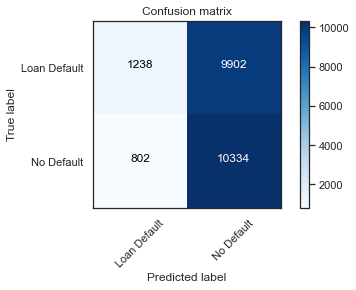

In [100]:
import itertools
classes=['Loan Default','No Default']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [101]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.61      0.11      0.19     11140
           1       0.51      0.93      0.66     11136

    accuracy                           0.52     22276
   macro avg       0.56      0.52      0.42     22276
weighted avg       0.56      0.52      0.42     22276



In [102]:
importances=final_model.feature_importances_
indices=np.argsort(importances)

In [103]:
plt.style.use('seaborn')

In [104]:
cols=X_train.columns.tolist()
cols

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Employment.Type',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'AVERAGE.ACCT.AGE',
 'CREDIT.HISTORY.LENGTH',
 'NO.OF_INQUIRIES',
 'B-Very Low Risk',
 'C-Very Low Risk',
 'D-Very Low Risk',
 'E-Low Risk',
 'F-Low Risk',
 'G-Low Risk',
 'H-Medium Risk',
 'I-Medium Risk',
 'J-High Risk',
 'K-High Risk',
 'L-Very High Risk',
 'M-Very High Risk',
 'No Score/No Hist

([<matplotlib.axis.XTick at 0x7fb128ce0c10>,
 [Text(0, 0, 'UniqueID'),
  Text(0, 0, 'NEW.ACCTS.IN.LAST.SIX.MONTHS'),
  Text(0, 0, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'),
  Text(0, 0, 'AVERAGE.ACCT.AGE'),
  Text(0, 0, 'CREDIT.HISTORY.LENGTH'),
  Text(0, 0, 'NO.OF_INQUIRIES'),
  Text(0, 0, 'B-Very Low Risk'),
  Text(0, 0, 'C-Very Low Risk'),
  Text(0, 0, 'D-Very Low Risk'),
  Text(0, 0, 'E-Low Risk'),
  Text(0, 0, 'F-Low Risk'),
  Text(0, 0, 'G-Low Risk'),
  Text(0, 0, 'H-Medium Risk'),
  Text(0, 0, 'I-Medium Risk'),
  Text(0, 0, 'J-High Risk'),
  Text(0, 0, 'K-High Risk'),
  Text(0, 0, 'L-Very High Risk'),
  Text(0, 0, 'No Score/No History'),
  Text(0, 0, 'Age_at_disbursal'),
  Text(0, 0, 'Salaried_High_CNS'),
  Text(0, 0, 'High_risk_High_loan'),
  Text(0, 0, 'Total_Accounts'),
  Text(0, 0, 'Too_many_accounts'),
  Text(0, 0, 'ltv_risk'),
  Text(0, 0, 'Total_Overdue_Accts'),
  Text(0, 0, 'Voter_ID_Overdue_accts'),
  Text(0, 0, 'SEC.INSTAL.AMT'),
  Text(0, 0, 'PRIMARY.INSTAL.AMT'),
  Text

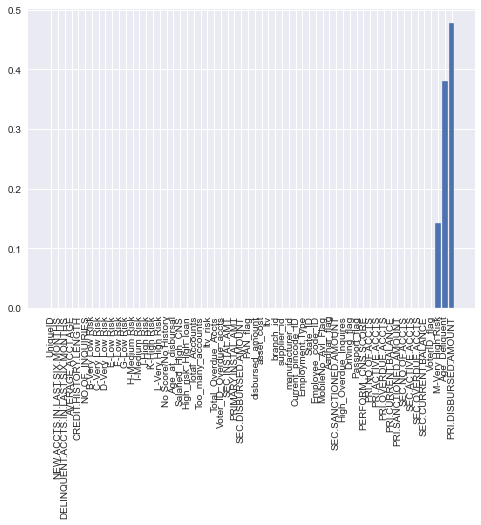

In [105]:
plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)),[cols[i] for i in indices],rotation=90)

In [106]:
importances = list(zip(importances, X_train.columns))
importances.sort(reverse=True)
test=pd.DataFrame(importances, index=[x for (_,x) in importances])

In [107]:
test.head()

,0,1
PRI.DISBURSED.AMOUNT,0.477454,PRI.DISBURSED.AMOUNT
Age_Deliquent,0.380781,Age_Deliquent
M-Very High Risk,0.141765,M-Very High Risk
supplier_id,0.000000,supplier_id
manufacturer_id,0.000000,manufacturer_id


In [108]:
test[0][1]

0.38078107960675944

In [119]:
test[0][0]

0.4774540532141458

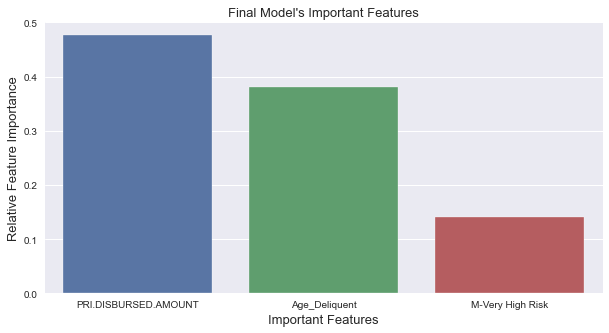

In [122]:
fig,ax=plt.subplots(figsize=(10,5))
ax.set_xlabel('Important Features',fontsize=13)
ax.set_ylabel('Relative Feature Importance',fontsize=13)
ax.set_title('Final Model\'s Important Features',fontsize=13)
sns.barplot(x=[test[1][0],test[1][1],test[1][2]],y=[test[0][0],test[0][1],test[0][2]],ax=ax)

In [123]:
fig.savefig('Final_Model_Important_Features.png')

In [124]:
df.shape

(202679, 63)

In [132]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'loan_default',
       'B-Very Low Risk', 'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk',
       'F-Low Risk', 'G-Low Risk', 'H-Medium Risk', 'I-Med

In [126]:
import pickle

In [127]:
filename='final_model.sav'
pickle.dump(final_model,open(filename,'wb'))

In [131]:
X.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment.Type', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'B-Very Low Risk',
       'C-Very Low Risk', 'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk',
       'G-Low Risk', 'H-Medium Risk', 'I-Medium Risk', 'J-High Risk',
       'K-High Risk', 'L